Perform ‘Exploratory Data Analysis(EDA)’ on dataset ‘Global Terrorism’

Author: **Valmiki Ganesh Deepak**


Problem Statement : From the given dataset, as a defence analyst you need to identify the hot zones through presenting the data visually. Link for the raw dataset: https://bit.ly/2TK5Xn5

In [2]:
#importing necessary libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_set = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'latin1')

C:\Users\vgane\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#the first 5 rows

data_set.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
#the last 5 rows

data_set.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
# all the columns in the dataset
data_set.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [7]:
#the shape of the data set
data_set.shape

(181691, 135)

In [8]:
#renaming the columns for better understanding

data_set.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [9]:
#taking only the sensible and necessary columns
data_set = data_set[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [10]:
data_set.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [11]:
data_set.shape          #columns was reduced from 135 to 18

(181691, 18)

In [12]:
#checking any missing data
data_set.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

We can see that there are some missing values in the data

In [13]:
data_set.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,181691.0,NaN,NaN,NaN,2002.638997,13.25943,1970.0,1991.0,2009.0,2014.0,2017.0
Month,181691.0,NaN,NaN,NaN,6.467277,3.388303,0.0,4.0,6.0,9.0,12.0
day,181691.0,NaN,NaN,NaN,15.505644,8.814045,0.0,8.0,15.0,23.0,31.0
Country,181691,205,Iraq,24636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,181270,2855,Baghdad,7645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,181691,12,Middle East & North Africa,50474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,181257,36674,Unknown,9775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,177135.0,NaN,NaN,NaN,23.498343,18.569242,-53.154613,11.510046,31.467463,34.685087,74.633553
longitude,177134.0,NaN,NaN,NaN,-458.695653,204778.988611,-86185896.0,4.54564,43.246506,68.710327,179.366667
Attacktype,181691,9,Bombing/Explosion,88255,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#filling the missing values(NaN) with 0
data_set['Wound'] = data_set['Wound'].fillna(0)
data_set['kill'] = data_set['kill'].fillna(0)
data_set['Casualities'] = data_set['kill'] + data_set['Wound']

Data Visualisation

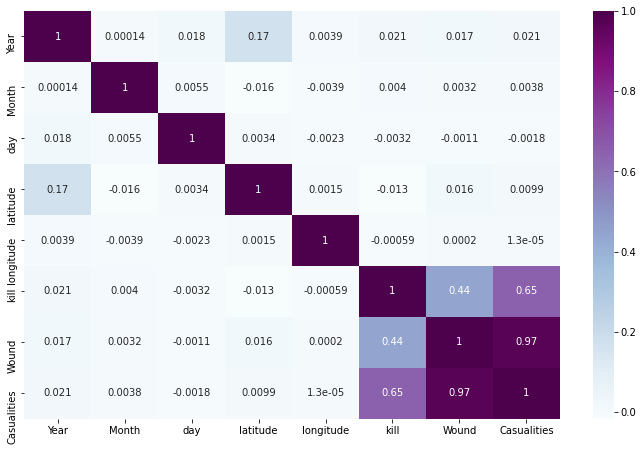

In [15]:
#showing the correlation between the columns
plt.figure(figsize=(12,7.5))
sns.heatmap(data_set.corr(),annot=True,cmap='BuPu');

C:\Users\vgane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


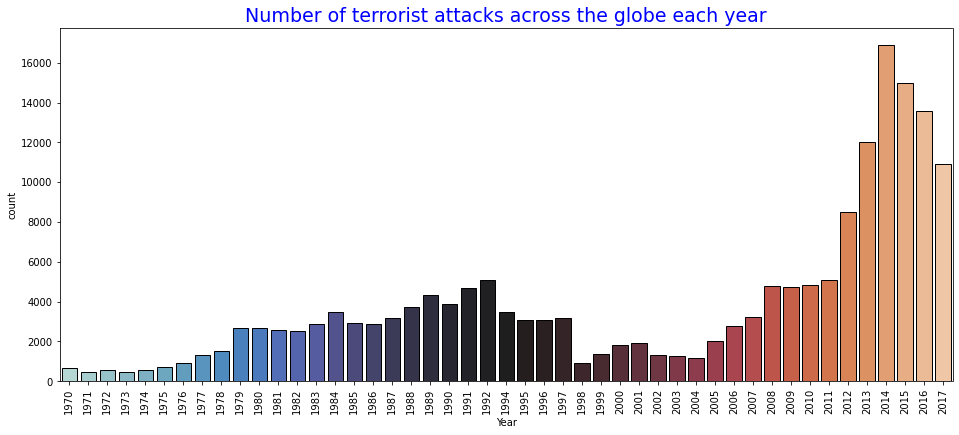

In [16]:
plt.subplots(figsize=(16,6.5))
sns.countplot('Year',data=data_set,edgecolor=('black') , palette='icefire')
plt.xticks(rotation=90)
plt.title('Number of terrorist attacks across the globe each year', fontsize = 19,c='b');

From the above chart we can say that the most number of terrorist attacks happened in the year 2014

C:\Users\vgane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


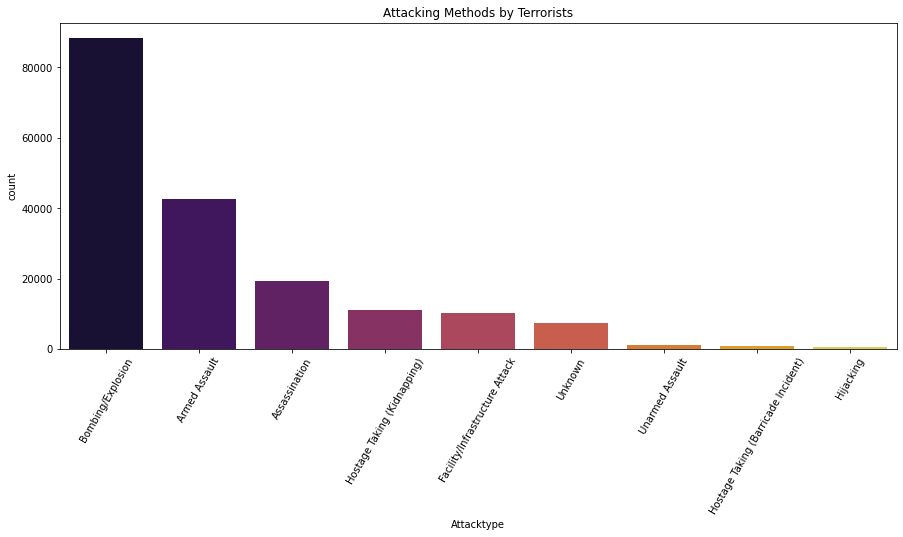

In [17]:
# Visualization to check the Attacking Methods by Terrorists

plt.subplots(figsize=(15,6))
sns.countplot('Attacktype',data=data_set,palette='inferno',order=data_set['Attacktype'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Attacking Methods by Terrorists');

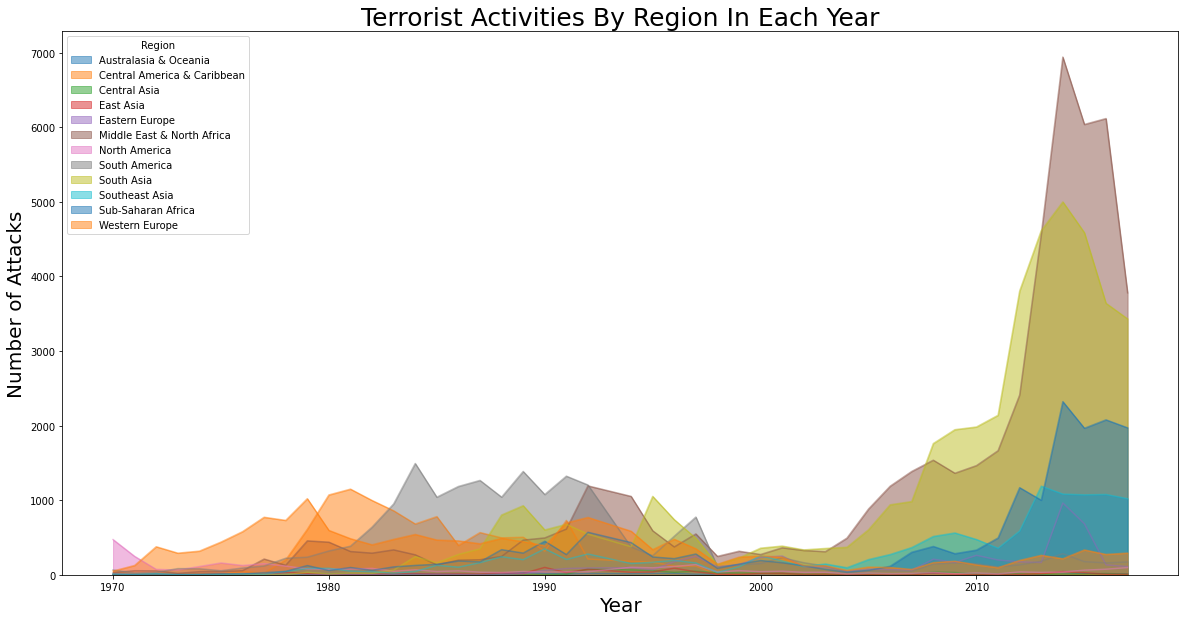

In [18]:
pd.crosstab(data_set.Year, data_set.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

Middle East and North Africa are the most terrorism prone regions followed by South Asia. - The East Asia, Central Asia, Australia & Oceania Region have experienced very few terrorism.

In [19]:
df=data_set[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

C:\Users\vgane\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


The terrorist groups responsible for the most number of deaths are Islamic State of Iraq and the Levant (ISIL) in IRAQ and Taliban in Afghanistan

Text(0.5, 1.0, 'Terrorist Groups with Highest Terror Attacks')

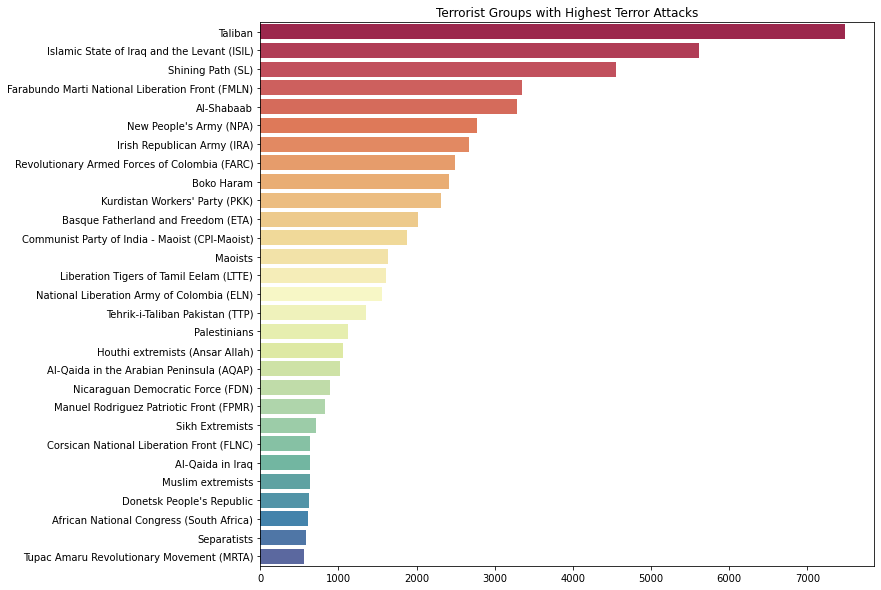

In [20]:
# Terrorist Groups with Highest Terror Attacks
plt.subplots(figsize=(11,10))
sns.barplot(y=data_set['Group'].value_counts()[1:30].index,  x=data_set['Group'].value_counts()[1:30].values, palette='Spectral')
plt.title('Terrorist Groups with Highest Terror Attacks')

The terrorist groups responsible for the most number of attacks are Taliban in Afghanistan and Islamic State of Iraq and the Levant (ISIL) in IRAQ

C:\Users\vgane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


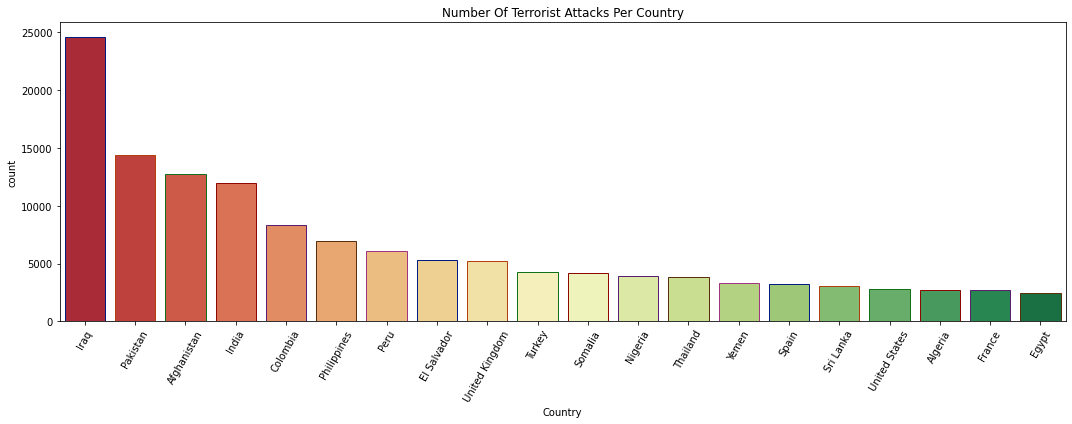

In [21]:
# Number Of Terrorist Attacks Per Country 
plt.subplots(figsize=(15,6))
sns.countplot('Country', data=data_set, palette='RdYlGn', edgecolor=sns.color_palette('dark',7), order=data_set['Country'].value_counts()[:20].index)
plt.xticks(rotation=60)
plt.title('Number Of Terrorist Attacks Per Country')
plt.tight_layout()

Iraq has a very large number of terrorist attacks followed by Pakistan, Afghanistan

**Wounded vs Killed by the attacks Visualization**

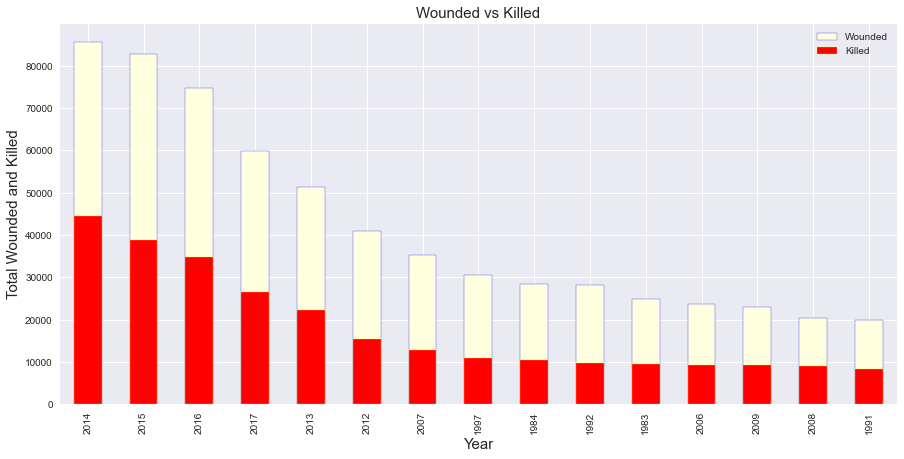

In [22]:
# Wounded vs Killed with respect to year
Casualty = data_set.groupby('Year').sum()['Casualities'].nlargest(n=15)        #top 15 states with highest sales
killed = data_set.groupby('Year').sum()['kill'].nlargest(n=15)                 #top 15 states with highest sales
plt.style.use('seaborn')
Casualty.plot(kind='bar', figsize=(15,7),fontsize = 10, color = 'lightyellow', label = 'Wounded', edgecolor=('blue'))
killed.plot(kind='bar', figsize=(15,7),fontsize = 10 , color='red', label = 'Killed', edgecolor = ('yellow'))
plt.xlabel('Year',fontsize = 15)
plt.legend()
plt.ylabel('Total Wounded and Killed',fontsize = 15)
plt.title("Wounded vs Killed",fontsize = 15)
plt.show()

#Conclusion :

###Hot zones are :


*  Top 3 Countries with most attacks are Iraq,Pakistan and Afganistan.

*   Top 3 Cities with most attacks are Unknown city, Baghdad and Karachi.


*   Top 3 regions with most attacks are Middle East & North Africa , South Asia and South America.

*   Year with most terrorist attacks is 2014 globally.



*   Most frequent terrorist groups involved in attacks are Taliban and Islamic State of Iraq and the Levant (ISIL).


###Security issues and Insights drawn from the data are :

1] The most frequent attack found is Bombing/Explosion , we can identify these type of attacks by :

Being alert in crowded places where explosions are most likely to happen.
Using Survillence cameras and security at crowded places to check for any suspicious activities.

2] Most frequent target types are Private Citizens & Property and Military. Constant survillence and proper checking should be done at the entrace by the use of metal detectors.

###**Exploratory Data Analysis is Done!**